# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
cities

['hilo',
 'jamestown',
 'srednekolymsk',
 'hobart',
 'saldanha',
 'san joaquin',
 'yellowknife',
 'morganton',
 'hithadhoo',
 'castro',
 'barentsburg',
 'hermanus',
 'gap',
 'brejning',
 'vaitupu',
 'sanmihaiu de campie',
 'ziarat',
 'rikitea',
 'thompson',
 'leh',
 'katsuura',
 'ushuaia',
 'sun valley',
 'ponta do sol',
 'carutapera',
 'vaitape',
 'qaanaaq',
 'port hardy',
 'kaitong',
 'hasaki',
 'atuona',
 'lolua',
 'arraial do cabo',
 'valparaiso',
 'bonavista',
 'lebu',
 'tabory',
 'lagos',
 'victoria',
 'bluff',
 'illoqqortoormiut',
 'hamilton',
 'khasan',
 'san jose',
 'tuktoyaktuk',
 'novokizhinginsk',
 'chokurdakh',
 'carnarvon',
 'kandrian',
 'emba',
 'oros',
 'busselton',
 'bethel',
 'hihifo',
 'puerto escondido',
 'douentza',
 'cape town',
 'balabac',
 'port-de-paix',
 'mataura',
 'port elizabeth',
 'poya',
 'taolanaro',
 'avarua',
 'tigil',
 'puerto ayora',
 'punta arenas',
 'jimma',
 'samarai',
 'wollongong',
 'tarko-sale',
 'provideniya',
 'cherskiy',
 'abha',
 'tasiilaq'

In [19]:
citiesTest = cities[0:500]

In [20]:
 citiesTest

['hilo',
 'jamestown',
 'srednekolymsk',
 'hobart',
 'saldanha',
 'san joaquin',
 'yellowknife',
 'morganton',
 'hithadhoo',
 'castro',
 'barentsburg',
 'hermanus',
 'gap',
 'brejning',
 'vaitupu',
 'sanmihaiu de campie',
 'ziarat',
 'rikitea',
 'thompson',
 'leh',
 'katsuura',
 'ushuaia',
 'sun valley',
 'ponta do sol',
 'carutapera',
 'vaitape',
 'qaanaaq',
 'port hardy',
 'kaitong',
 'hasaki',
 'atuona',
 'lolua',
 'arraial do cabo',
 'valparaiso',
 'bonavista',
 'lebu',
 'tabory',
 'lagos',
 'victoria',
 'bluff',
 'illoqqortoormiut',
 'hamilton',
 'khasan',
 'san jose',
 'tuktoyaktuk',
 'novokizhinginsk',
 'chokurdakh',
 'carnarvon',
 'kandrian',
 'emba',
 'oros',
 'busselton',
 'bethel',
 'hihifo',
 'puerto escondido',
 'douentza',
 'cape town',
 'balabac',
 'port-de-paix',
 'mataura',
 'port elizabeth',
 'poya',
 'taolanaro',
 'avarua',
 'tigil',
 'puerto ayora',
 'punta arenas',
 'jimma',
 'samarai',
 'wollongong',
 'tarko-sale',
 'provideniya',
 'cherskiy',
 'abha',
 'tasiilaq'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
resultsDataframe = pd.DataFrame({
    "City":[],
    "Cloudiness": [],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
})
base_url = 'http://api.openweathermap.org/data/2.5/weather'
index = 1;
for city in citiesTest:    
    params = {
        'q': city,
        'APPID': '1e7ce3f80af2ad5a262f54a89f59665a'
    }    
    try:    
        response = requests.get(base_url, params=params)
        result = response.json()
        print(f"Retrieving Results from {response.url}")
        print(f"Retrieving Results for city: {response.status_code} {city}.")

        resultsDataframe.loc[index] = [
            city,
            result["clouds"]["all"],
            result["sys"]["country"],
            result["dt"],
            result["main"]["humidity"],
            result["coord"]["lat"],
            result["coord"]["lon"],
            result["main"]["temp_max"],
            result["wind"]["speed"],
        ]
        index += 1
    except:
        print("City nof found. Skipping...")
    

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=hilo&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 hilo.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 jamestown.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 srednekolymsk.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=hobart&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 hobart.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=saldanha&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 saldanha.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=san+joaquin&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 san joaquin.
Retrieving

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=emba&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 emba.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=oros&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 oros.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=busselton&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 busselton.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bethel&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bethel.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=hihifo&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 404 hihifo.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=puerto+escondido&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 puerto escon

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kapaa&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 kapaa.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=dongli&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 dongli.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=basqal&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 basqal.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=storforshei&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 storforshei.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=mahebourg&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 mahebourg.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=east+london&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 east london.
Retrieving Resul

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=chuy&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 chuy.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=acobamba&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 acobamba.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bougouni&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bougouni.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tumannyy&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 404 tumannyy.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=mayo&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 mayo.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bambous+virieux&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bambous

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kununurra&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 kununurra.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=victor+harbor&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 victor harbor.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=narsaq&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 narsaq.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=egvekinot&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 egvekinot.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=arman&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 arman.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bredasdorp.
Retrievi

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=acarigua&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 acarigua.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=okha&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 okha.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kazachinskoye&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 kazachinskoye.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ostersund&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 ostersund.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=torbay&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 torbay.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=cheney&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 cheney.
Retrieving Results f

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=khilok&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 khilok.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=otjimbingwe&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 otjimbingwe.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=porto+novo&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 porto novo.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=warqla&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 404 warqla.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=caravelas&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 caravelas.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results fo

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ambulu&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 ambulu.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=grand+river+south+east&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 404 grand river south east.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tuy+hoa&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 tuy hoa.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ulety&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 ulety.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kaitangata&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 kaitangata.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=alice+springs&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrie

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=miri&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 miri.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tecoanapa&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 tecoanapa.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tambovka&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 tambovka.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ujjain&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 ujjain.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bubaque&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bubaque.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tadine&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 tadine.
Retrieving Results from http://a

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=huarmey&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 huarmey.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=san+cristobal&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 san cristobal.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bintulu&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 bintulu.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=puerto+el+triunfo&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 puerto el triunfo.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=puerto+narino&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 puerto narino.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=rawson&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=prince+rupert&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 prince rupert.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=akom&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 akom.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=pacific+grove&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 pacific grove.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=faya&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 200 faya.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bairiki&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 404 bairiki.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ternate&APPID=1e7ce3f80af2ad5a262f54a89f59665a
Retrieving Results for city: 2

In [16]:
resultsDataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,hilo,90.0,US,1.554166e+09,65.0,19.71,-155.08,299.150,3.60
2,jamestown,0.0,AU,1.554166e+09,69.0,-33.21,138.60,289.646,2.50
3,srednekolymsk,68.0,RU,1.554166e+09,79.0,67.46,153.71,264.846,1.50
4,hobart,75.0,AU,1.554166e+09,54.0,-42.88,147.33,289.820,4.60
5,saldanha,64.0,PT,1.554166e+09,89.0,41.42,-6.55,281.146,1.10
6,san joaquin,36.0,PH,1.554166e+09,80.0,10.59,122.14,298.646,5.45
7,yellowknife,75.0,CA,1.554166e+09,57.0,62.45,-114.38,268.150,9.80
8,morganton,1.0,US,1.554166e+09,60.0,35.75,-81.69,282.590,1.50
9,hithadhoo,68.0,MV,1.554166e+09,100.0,-0.60,73.08,301.096,3.45
10,castro,90.0,CL,1.554163e+09,100.0,-42.48,-73.76,284.150,5.70


In [17]:
resultsDataframe.size

4041

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
resultsDataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,hilo,90.0,US,1.554166e+09,65.0,19.71,-155.08,299.150,3.6
2,jamestown,0.0,AU,1.554166e+09,69.0,-33.21,138.60,289.646,2.5
3,srednekolymsk,68.0,RU,1.554166e+09,79.0,67.46,153.71,264.846,1.5
4,hobart,75.0,AU,1.554166e+09,54.0,-42.88,147.33,289.820,4.6
5,saldanha,64.0,PT,1.554166e+09,89.0,41.42,-6.55,281.146,1.1


In [21]:
resultsDataframe.count()

City          449
Cloudiness    449
Country       449
Date          449
Humidity      449
Lat           449
Lng           449
Max Temp      449
Wind Speed    449
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

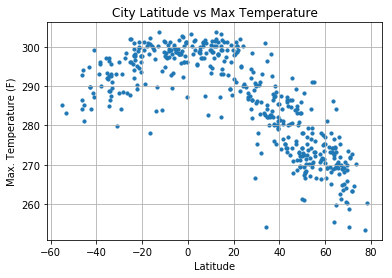

In [22]:
# Build a scatter plot for each data type
plt.scatter(resultsDataframe["Lat"], resultsDataframe["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

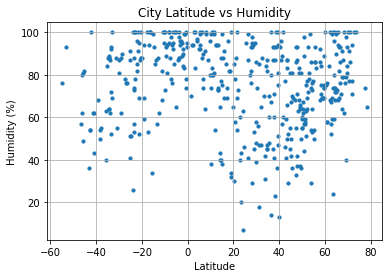

In [23]:
# Build a scatter plot for each data type

plt.scatter(resultsDataframe["Lat"], resultsDataframe["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

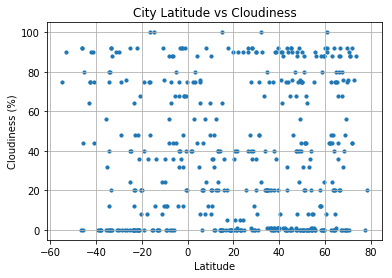

In [24]:
# Build a scatter plot for each data type

plt.scatter(resultsDataframe["Lat"], resultsDataframe["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show() 

#### Latitude vs. Wind Speed Plot

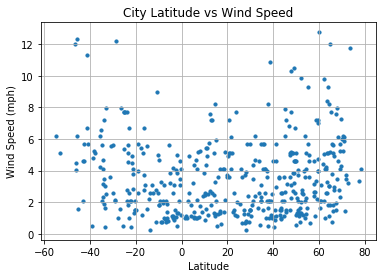

In [25]:
# Build a scatter plot for each data type

plt.scatter(resultsDataframe["Lat"], resultsDataframe["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind Speed_vs_Latitude.png")

# Show plot
plt.show() 